# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

# Local sports teams winning percentage impact on crime

The winning percentage of the Pittsburgh Steelers, Pittsburgh Pirates, and Pittsburgh Penguins will be compared to the number of arrests over that time frame.

Does a winning season or a losing season impact the number of arrests, or is there no correlation?

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

### Crime Data

The crime data from the City of Pittsburgh is provided at https://data.wprdc.org/dataset/arrest-data.

The ARRESTTIME field will be used to obtain the day and year of the arrest to compare against the Penguins, Pirates, and Steelers seasons. Since the crime data only goes back to 1998 the range of comparisons will be 1998 to 2023.

In [275]:
crime = pd.read_csv(r"data\pittsburgh_arrest_data.csv").set_index("_id")
crime["ARRESTDATE"] = pd.to_datetime(crime["ARRESTTIME"]).dt.date
crime["YEAR"] = pd.to_datetime(crime["ARRESTTIME"]).dt.year
crime["MONTH"] = pd.to_datetime(crime["ARRESTTIME"]).dt.month
crime.sort_values("ARRESTTIME").head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,ARRESTDATE,YEAR,MONTH
_id,,,,,,,,,,,,,,,,,,,
34386,2014598,97210975,22.0,M,B,1998-03-11T11:30:00,"NEW YORK CITY , NY",2501 Criminal Homicide.,",",NaN,NaN,NaN,NaN,NaN,-80.222547,40.577409,1998-03-11,1998,3
56533,2033518,98246337,27.0,M,W,1998-10-13T12:45:00,"600 Block 1ST AV PITTSBURGH, PA 15219",9014 Out of State Arrest / 9015 Failure To App...,"600 Block 1ST AV PITTSBURGH, PA 15219",Central Business District,2,201.0,6.0,6.0,-79.996041,40.435040,1998-10-13,1998,10
52937,2030383,2186691,15.0,M,B,2003-03-17T09:00:00,"900 Block E CARSON ST PITTSBURGH, PA 15203",2702 Aggravated Assault. / 3701 Robbery.,"COLOGNE ST & ARLINGTON AV PITTSBURGH, PA",NaN,3,NaN,3.0,3.0,-79.969449,40.417510,2003-03-17,2003,3
52938,2030384,2186691,15.0,M,B,2003-03-17T09:30:00,"900 Block E CARSON ST PITTSBURGH, PA 15203",2702 Aggravated Assault. / 3701 Robbery.,"COLOGNE ST & ARLINGTON AV PITTSBURGH, PA",NaN,3,NaN,3.0,3.0,-79.969449,40.417510,2003-03-17,2003,3
83555,2058942,5162890,18.0,F,B,2005-08-21T01:27:00,"17TH ST & SMALLMAN ST PITTSBURGH, PA",5503 Disorderly Conduct. / 2701(a)(1) Simple A...,"17TH ST & SMALLMAN ST PITTSBURGH, PA 15219",NaN,2,NaN,7.0,6.0,-79.986784,40.450330,2005-08-21,2005,8


### Pittsburgh Penguins win/loss data

The Pittsburgh Penguins win/loss data is obtained from Wikipedia. The NHL season typically runs from October until June. The time frame of October 1998 until June 2023 will be compared.

In [276]:
penguins = pd.read_html(
    "https://en.wikipedia.org/wiki/List_of_Pittsburgh_Penguins_seasons"
)[2]
penguins = penguins.iloc[31:-1, :13]
penguins.columns = (col[1] for col in penguins.columns)
penguins["Season"] = penguins["Season"].astype(str).replace("\[\w\]", "", regex=True)
penguins["Season"] = penguins["Season"].str.split("–", expand=True)[0]
penguins = penguins.set_index("Season")
penguins = penguins[penguins["Conference"] != "Season not played due to lockout"]
penguins["Pct"] = penguins["W"].astype(int) / penguins["GP"].astype(int)
penguins.head()

,Penguins season,Conference,Division,Finish,GP,W,L,T[5],OT[6],Pts,GF,GA,Pct
Season,,,,,,,,,,,,,
1998,1998–99,Eastern,Atlantic,3rd,82,38,30,14,—,90,242,225,0.463415
1999,1999–2000,Eastern,Atlantic,3rd,82,37,31,8,6,88,241,236,0.451220
2000,2000–01,Eastern,Atlantic,3rd,82,42,28,9,3,96,281,256,0.512195
2001,2001–02,Eastern,Atlantic,5th,82,28,41,8,5,69,198,249,0.341463
2002,2002–03,Eastern,Atlantic,5th,82,27,44,6,5,65,189,255,0.329268


### Pittsburgh Pirates win/loss data

The Pittsburgh Pirates win/loss data is obtained from Wikipedia. The Major League Baseball season typically runs from May into October. The crime data will be compared from May 1998 through October 2023.

In [277]:
pirates = pd.read_html(
    "https://en.wikipedia.org/wiki/List_of_Pittsburgh_Pirates_seasons",
    skiprows=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
)[2]
pirates.columns = (col[0] for col in pirates.columns)
pirates = pirates.iloc[:-6, :-1]
pirates = pirates.reset_index().set_index("MLB season")
pirates = pirates[pirates.index >= "1998"]
pirates["Pct"] = pirates["Wins"].astype(int) / (
    pirates["Wins"].astype(int) + pirates["Losses"].astype(int)
)
pirates.head()

,index,Team season,League,Division,Finish,Wins,Losses,Win%,GB,Post-season,Awards[7],Pct
MLB season,,,,,,,,,,,,
1998,108,1998,NL,Central,6th,69,93,.426,33,NaN,NaN,0.425926
1999,109,1999,NL,Central,3rd,78,84,.484,18½,NaN,NaN,0.481481
2000,110,2000[r],NL,Central,5th,69,93,.426,26,NaN,NaN,0.425926
2001,111,2001,NL,Central,6th,62,100,.383,31,NaN,NaN,0.382716
2002,112,2002,NL,Central,4th,72,89,.447,24½,NaN,NaN,0.447205


### Pittsburgh Steelers win/loss data

The Pittsburgh Steelers win/loss data is obtained from Wikipedia. The National Football league season typically runs from September through January. The crime data will be compared from September 1998 through January 2024.

In [278]:
steelers = pd.read_html(
    "https://en.wikipedia.org/wiki/List_of_Pittsburgh_Steelers_seasons"
)[1]
steelers.columns = (col[1] for col in steelers.columns)
steelers = steelers.iloc[17:-3, :].set_index("Season")
steelers = steelers[steelers.index >= "1998"]
steelers["Pct"] = steelers["W"].astype(int) / (
    steelers["W"].astype(int) + steelers["L"].astype(int) + steelers["T"].astype(int)
)
steelers.head()

,Team,League,Conference,Division,Finish,W,L,T,Pct[1],Postseason results,Awards,Head coaches,Pct
Season,,,,,,,,,,,,,
1998,1998,NFL,AFC,Central,3rd,7,9,0,.438,NaN,NaN,Bill Cowher,0.4375
1999,1999,NFL,AFC,Central,4th,6,10,0,.375,NaN,NaN,Bill Cowher,0.3750
2000,2000,NFL,AFC,Central,3rd,9,7,0,.563,NaN,NaN,Bill Cowher,0.5625
2001,2001,NFL,AFC,Central,1st,13,3,0,.813,Won Divisional Playoffs (Ravens) 27–10 Lost AF...,Kendrell Bell (DROY),Bill Cowher,0.8125
2002,2002,NFL,AFC,North,1st,10,5,1,.656,Won Wild Card Playoffs (Browns) 36–33 Lost Div...,Tommy Maddox (CBPOY),Bill Cowher,0.6250


## Exploratory Data Analysis

Looking at the arrest data the number of arrests look to be very limited from 2016 and earlier. Since the issue looks to be caused limited data collection the comparison between crime and sports teams winning percentage will be limited to 2017-2023.

Text(0, 0.5, 'Number of Arrests')

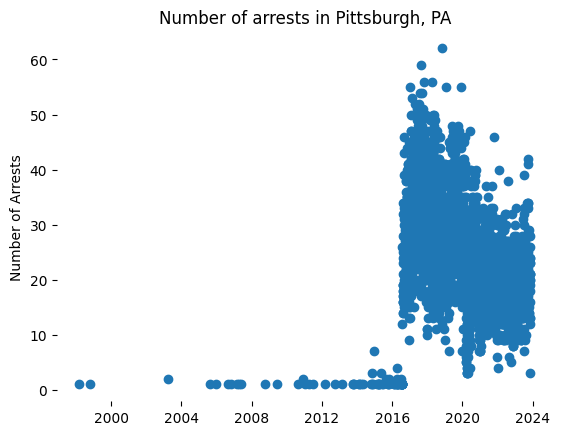

In [279]:
number_of_arrests = crime.groupby("ARRESTDATE")["YEAR"].count()
plt.scatter(x=number_of_arrests.index, y=number_of_arrests)
plt.box(False)
plt.title("Number of arrests in Pittsburgh, PA")
plt.ylabel("Number of Arrests")

Text(0, 0.5, 'Number of Arrests')

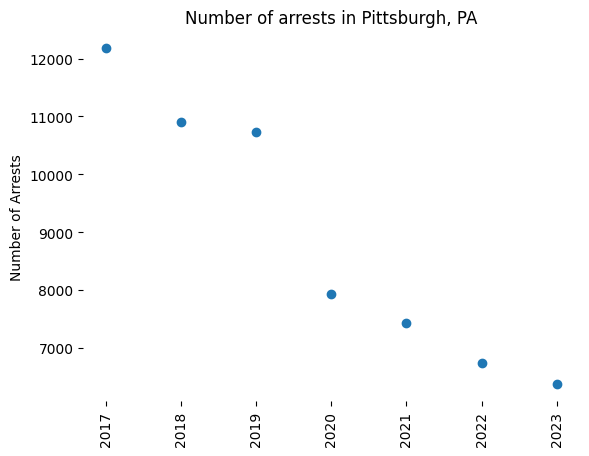

In [280]:
number_of_arrests = crime[crime["YEAR"] >= 2017].groupby("YEAR")["ARRESTTIME"].count()
plt.scatter(x=number_of_arrests.index, y=number_of_arrests)
plt.box(False)
plt.title("Number of arrests in Pittsburgh, PA")
plt.xticks(rotation=90)
plt.ylabel("Number of Arrests")

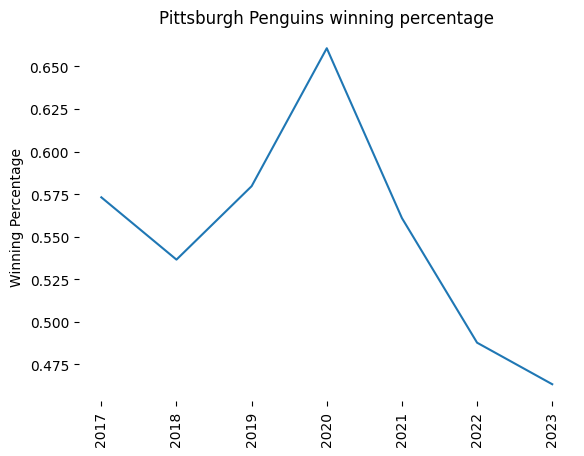

In [281]:
penguins = penguins.iloc[18:, :]
plt.plot(penguins.index, penguins["Pct"])
plt.title("Pittsburgh Penguins winning percentage")
plt.ylabel("Winning Percentage")
plt.box("False")
plt.xticks(rotation=90)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

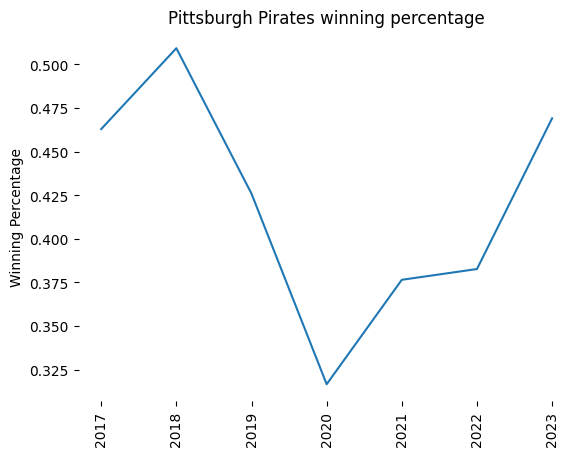

In [282]:
pirates = pirates[pirates.index > "2016"]
plt.plot(pirates.index, pirates["Pct"])
plt.title("Pittsburgh Pirates winning percentage")
plt.ylabel("Winning Percentage")
plt.box("False")
plt.xticks(rotation=90)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

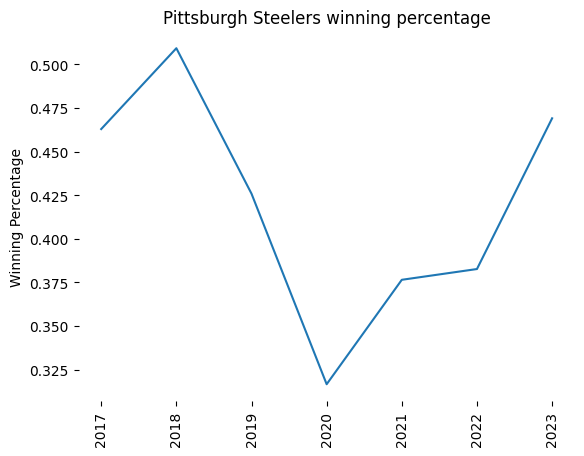

In [283]:
steelers = steelers[steelers.index > "2016"]
plt.plot(steelers.index, pirates["Pct"])
plt.title("Pittsburgh Steelers winning percentage")
plt.ylabel("Winning Percentage")
plt.box("False")
plt.xticks(rotation=90)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

## Compare crime to Win %

In [284]:
filtered_crime = crime[crime["YEAR"] >= 2017]
penguins_crime = filtered_crime[
    (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2017-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2018-06-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2018-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2019-06-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2019-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2020-06-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2020-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2021-06-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2021-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2022-06-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2022-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2023-06-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2023-10-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2024-06-30")
    )
]

Normalizing the number of arrests over the time frame of the Pittsburgh Penguins season allows for the same y axis. There does not seem to be any correlation between the Penguins winning percentage and the number of arrests for crimes committed in Pittsburgh.

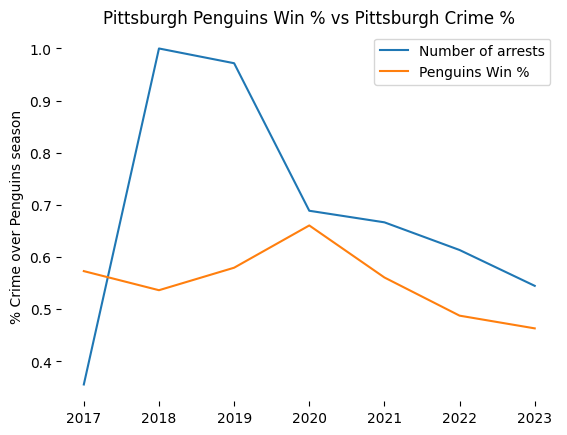

In [285]:
penguins_crime_year = penguins_crime.groupby("YEAR")["ARRESTTIME"].count()
penguins.index = (int(idx) for idx in penguins.index)
penguins_crime_year = penguins_crime_year / penguins_crime_year.max()
plt.plot(penguins_crime_year.index, penguins_crime_year, label="Number of arrests")
plt.plot(penguins.index, penguins["Pct"], label="Penguins Win %")
plt.box(False)
plt.title("Pittsburgh Penguins Win % vs Pittsburgh Crime %")
plt.ylabel("% Crime over Penguins season")
plt.legend()

In [286]:
pirates_crime = filtered_crime[
    (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2017-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2017-10-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2018-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2018-10-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2019-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2019-10-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2020-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2020-10-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2021-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2021-10-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2022-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2022-10-30")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2023-04-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2023-10-30")
    )
]

Similar to the Penguins season there does not appear to be any correlation to crime in Pittsburgh and the winning % of the Pittsburgh Pirates

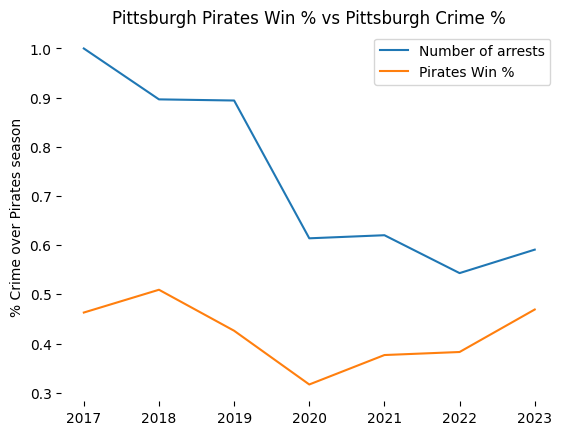

In [287]:
pirates_crime_year = pirates_crime.groupby("YEAR")["ARRESTTIME"].count()
pirates.index = (int(idx) for idx in pirates.index)
pirates_crime_year = pirates_crime_year / pirates_crime_year.max()
plt.plot(pirates_crime_year.index, pirates_crime_year, label="Number of arrests")
plt.plot(pirates.index, pirates["Pct"], label="Pirates Win %")
plt.box(False)
plt.title("Pittsburgh Pirates Win % vs Pittsburgh Crime %")
plt.ylabel("% Crime over Pirates season")
plt.legend()

In [288]:
steelers_crime = filtered_crime[
    (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2017-09-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2018-02-01")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2018-09-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2019-02-01")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2019-09-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2020-02-01")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2020-09-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2021-02-01")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2021-09-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2022-02-01")
    )
    | (
        (filtered_crime["ARRESTDATE"].astype(str) >= "2022-09-01")
        & (filtered_crime["ARRESTDATE"].astype(str) <= "2023-02-01")
    )
]

There does not seem to be any correlation between crime and the Steelers winning percentage.

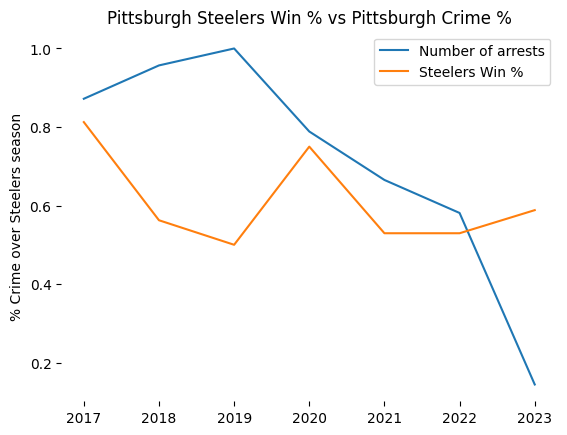

In [289]:
steelers_crime_year = steelers_crime.groupby("YEAR")["ARRESTTIME"].count()
steelers.index = (int(idx) for idx in steelers.index)
steelers_crime_year = steelers_crime_year / steelers_crime_year.max()
plt.plot(steelers_crime_year.index, steelers_crime_year, label="Number of arrests")
plt.plot(steelers.index, steelers["Pct"], label="Steelers Win %")
plt.box(False)
plt.title("Pittsburgh Steelers Win % vs Pittsburgh Crime %")
plt.ylabel("% Crime over Steelers season")
plt.legend()

### Conclusion

The hypothesis was that crime may be correlated with local sport teams win/loss records. Either the success or failure of a local sports team would see an increase or decrease in the area. For the time frame of 2017-2023 this does not appear to hold true for the city of Pittsburgh.

Further analysis could be done to see if an extended period of losing caused an increase in crime or if crime spiked immediately after a championship win or playoff loss.